http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html

In [76]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = pd.read_excel('/Users/aiymsergazina/Downloads/Risk-default-prediction-master/Zhandos/FPD60_Data_for_prediction.xlsx',na_values = ['nan'])

In [77]:
data

,AMT_CREDIT_TOTAL,CLIENT_DATE_BIRTH,NAME_INCOME_TYPE,AMT_INCOME_MAIN,MOBILE_PHONE,GCVP_0,AMT_PAYMENT_AVG,CNT_PAYMENTS,CODE_CLIENT_TYPE,GSPN_HIST,...,FLAG_RPC,NAME_PRODUCT_TYPE,GOODS_CATEGORY,CNT_GOODS,TOTAL_GOODS_PRICE,FLAG_HAS_EXTRA_LIMIT,AMT_EXTRA_LIMIT,FLAG_USED_EXT_LIMIT,AMT_WITHDRAWAL_CASH,TARGET
0,138569,1968-07-30,коммерч. сотрудник,230000,7.078303e+09,1.0,0.00,0.0,NaN,50,...,1,Revolving loans,Tablets / Communicators,1.0,139990.0,0.0,0.0,0.0,NaN,1
1,199980,1985-03-24,коммерч. сотрудник,270000,7.074612e+09,NaN,NaN,NaN,Existing,500,...,1,Revolving loans,Audio and video equipment,2.0,199980.0,0.0,0.0,0.0,211800.0,1
2,384456,1950-10-03,пенсионер,160000,7.753682e+09,NaN,NaN,NaN,Existing,6,...,0,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,525423,1960-07-13,гос. служащий,200000,7.012881e+09,NaN,NaN,0.0,Existing,63,...,1,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100123,1964-06-16,рабочий,90000,7.775792e+09,0.0,2498.32,3.0,Existing,102,...,0,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,115990,1980-05-08,коммерч. сотрудник,250000,7.059808e+09,0.0,20082.68,6.0,Existing,32,...,0,Consumer loans,Household appliances,1.0,115990.0,NaN,NaN,NaN,NaN,0
10075,199990,1994-06-14,коммерч. сотрудник,400000,7.058339e+09,0.0,4250.00,6.0,Existing,35,...,1,Consumer loans,Office supplies,1.0,199990.0,NaN,NaN,NaN,NaN,0
10076,227929,1985-04-01,гос. служащий,345554,7.027183e+09,0.0,3572.50,3573.0,New,41,...,0,Consumer loans,Household appliances,1.0,227929.0,NaN,NaN,NaN,NaN,0
10077,309532,1977-11-23,гос. служащий,98000,7.029024e+09,0.0,7908.17,8.0,New,60,...,0,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 0 to 10078
Data columns (total 23 columns):
AMT_CREDIT_TOTAL        10079 non-null int64
CLIENT_DATE_BIRTH       10079 non-null datetime64[ns]
NAME_INCOME_TYPE        10079 non-null object
AMT_INCOME_MAIN         10079 non-null int64
MOBILE_PHONE            9959 non-null float64
GCVP_0                  8088 non-null float64
AMT_PAYMENT_AVG         8088 non-null float64
CNT_PAYMENTS            8101 non-null float64
CODE_CLIENT_TYPE        10078 non-null object
GSPN_HIST               10079 non-null object
GSPN_NOW                10079 non-null int64
FLAG_EXCLUDED_WC        10079 non-null int64
FLAG_WC                 10079 non-null int64
FLAG_RPC                10079 non-null int64
NAME_PRODUCT_TYPE       10079 non-null object
GOODS_CATEGORY          7479 non-null object
CNT_GOODS               7479 non-null float64
TOTAL_GOODS_PRICE       7479 non-null float64
FLAG_HAS_EXTRA_LIMIT    212 non-null float64
AMT_EXTRA_LIMIT  

In [79]:
data.isna().sum()

AMT_CREDIT_TOTAL           0
CLIENT_DATE_BIRTH          0
NAME_INCOME_TYPE           0
AMT_INCOME_MAIN            0
MOBILE_PHONE             120
GCVP_0                  1991
AMT_PAYMENT_AVG         1991
CNT_PAYMENTS            1978
CODE_CLIENT_TYPE           1
GSPN_HIST                  0
GSPN_NOW                   0
FLAG_EXCLUDED_WC           0
FLAG_WC                    0
FLAG_RPC                   0
NAME_PRODUCT_TYPE          0
GOODS_CATEGORY          2600
CNT_GOODS               2600
TOTAL_GOODS_PRICE       2600
FLAG_HAS_EXTRA_LIMIT    9867
AMT_EXTRA_LIMIT         9867
FLAG_USED_EXT_LIMIT     9867
AMT_WITHDRAWAL_CASH     9967
TARGET                     0
dtype: int64

In [80]:
Y = data["TARGET"]
X = pd.DataFrame(zip(data.CNT_GOODS,
                     data.CODE_CLIENT_TYPE, 
                     data.AMT_CREDIT_TOTAL, 
                     data.AMT_INCOME_MAIN,
                     data.AMT_PAYMENT_AVG, 
                     data.NAME_INCOME_TYPE,  
                     data.NAME_PRODUCT_TYPE,  
                     data.GOODS_CATEGORY ))

In [81]:
Y.value_counts() # 17% 

0    8612
1    1467
Name: TARGET, dtype: int64

In [82]:
X.columns = ["CNT_GOODS",
             "CODE_CLIENT_TYPE",
             "AMT_CREDIT_TOTAL",
             "AMT_INCOME_MAIN",
             "AMT_PAYMENT_AV",
             "NAME_INCOME_TYPE",
             "NAME_PRODUCT_TYPE",
             "GOODS_CATEGORY"]

In [83]:
X.isna().sum()

CNT_GOODS            2600
CODE_CLIENT_TYPE        1
AMT_CREDIT_TOTAL        0
AMT_INCOME_MAIN         0
AMT_PAYMENT_AV       1991
NAME_INCOME_TYPE        0
NAME_PRODUCT_TYPE       0
GOODS_CATEGORY       2600
dtype: int64

In [84]:
X.AMT_PAYMENT_AV = X.AMT_PAYMENT_AV.median()

In [85]:
d = {'Existing': 1, 'New': 0}
X = X.replace({"CODE_CLIENT_TYPE": d})
X

,CNT_GOODS,CODE_CLIENT_TYPE,AMT_CREDIT_TOTAL,AMT_INCOME_MAIN,AMT_PAYMENT_AV,NAME_INCOME_TYPE,NAME_PRODUCT_TYPE,GOODS_CATEGORY
0,1.0,NaN,138569,230000,12044.78,коммерч. сотрудник,Revolving loans,Tablets / Communicators
1,2.0,1.0,199980,270000,12044.78,коммерч. сотрудник,Revolving loans,Audio and video equipment
2,NaN,1.0,384456,160000,12044.78,пенсионер,Cash loans,NaN
3,NaN,1.0,525423,200000,12044.78,гос. служащий,Cash loans,NaN
4,NaN,1.0,100123,90000,12044.78,рабочий,Cash loans,NaN
...,...,...,...,...,...,...,...,...
10074,1.0,1.0,115990,250000,12044.78,коммерч. сотрудник,Consumer loans,Household appliances
10075,1.0,1.0,199990,400000,12044.78,коммерч. сотрудник,Consumer loans,Office supplies
10076,1.0,0.0,227929,345554,12044.78,гос. служащий,Consumer loans,Household appliances
10077,NaN,0.0,309532,98000,12044.78,гос. служащий,Cash loans,NaN


In [86]:
di = {'Consumer loans': 1, 'Cash loans': 2, 'Revolving loans': 3}
X = X.replace({"NAME_PRODUCT_TYPE": di})

In [87]:
X1 = X.drop(columns=["NAME_INCOME_TYPE","GOODS_CATEGORY"])

In [88]:
X1 = X1.fillna(0) 
X1

,CNT_GOODS,CODE_CLIENT_TYPE,AMT_CREDIT_TOTAL,AMT_INCOME_MAIN,AMT_PAYMENT_AV,NAME_PRODUCT_TYPE
0,1.0,0.0,138569,230000,12044.78,3
1,2.0,1.0,199980,270000,12044.78,3
2,0.0,1.0,384456,160000,12044.78,2
3,0.0,1.0,525423,200000,12044.78,2
4,0.0,1.0,100123,90000,12044.78,2
...,...,...,...,...,...,...
10074,1.0,1.0,115990,250000,12044.78,1
10075,1.0,1.0,199990,400000,12044.78,1
10076,1.0,0.0,227929,345554,12044.78,1
10077,0.0,0.0,309532,98000,12044.78,2


In [89]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.33, random_state = 5)

In [90]:
print(X1_train.shape)
print(X1_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6752, 6)
(3327, 6)
(6752,)
(3327,)


*Применение алгоритмов*

## Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [95]:
l = LogisticRegression()

In [96]:
l.fit(X1_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
Y_predict = l.predict(X1_test)

In [98]:
score = l.score(X1_test, Y_test)
print(score)

0.8512173128944995


In [99]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_predict)

0.8512173128944995

In [100]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(Y_test, Y_predict) 
print('Confusion Matrix :')
print(results)
print('Accuracy Score :')
accuracy_score(Y_test, Y_predict) 
print('Report : ')
print(classification_report(Y_test, Y_predict))

Confusion Matrix :
[[2832    0]
 [ 495    0]]
Accuracy Score :
Report : 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2832
           1       0.00      0.00      0.00       495

    accuracy                           0.85      3327
   macro avg       0.43      0.50      0.46      3327
weighted avg       0.72      0.85      0.78      3327



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

Mean Absolute Error: 0.14878268710550044
Mean Squared Error: 0.14878268710550044
Root Mean Squared Error: 0.38572358899281806


## K Neighbors Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=3)
n.fit(X1_train, Y_train) 
Y_predict_knn = n.predict(X1_test)
metrics.accuracy_score(Y_test, Y_predict_knn)

0.8145476405169823

In [106]:
results = confusion_matrix(Y_test, Y_predict) 
print('Confusion Matrix :')
print(results)
print('Accuracy Score :')
accuracy_score(Y_test, Y_predict) 
print('Report : ')
print(classification_report(Y_test,Y_predict_knn))

Confusion Matrix :
[[2832    0]
 [ 495    0]]
Accuracy Score :
Report : 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2832
           1       0.21      0.09      0.13       495

    accuracy                           0.81      3327
   macro avg       0.54      0.52      0.51      3327
weighted avg       0.76      0.81      0.78      3327



In [107]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predict_knn))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predict_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_knn)))

Mean Absolute Error: 0.18545235948301772
Mean Squared Error: 0.18545235948301772
Root Mean Squared Error: 0.43064179950745346


## Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
regressor = RandomForestClassifier(n_estimators=2000, random_state=0)
R = regressor.fit(X1_train, Y_train)
Y1_predict = regressor.predict(X1_test)

In [124]:
results = confusion_matrix(Y_test, Y1_predict) 
print('Confusion Matrix :')
print(results)
print('Accuracy Score :')
accuracy_score(Y_test, Y1_predict) 
print('Report : ')
print(classification_report(Y_test, Y1_predict))

Confusion Matrix :
[[2679  153]
 [ 383  112]]
Accuracy Score :
Report : 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2832
           1       0.42      0.23      0.29       495

    accuracy                           0.84      3327
   macro avg       0.65      0.59      0.60      3327
weighted avg       0.81      0.84      0.82      3327



In [125]:
metrics.accuracy_score(Y_test, Y1_predict)

0.8388938984069733

In [126]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y1_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y1_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y1_predict)))

Mean Absolute Error: 0.16110610159302674
Mean Squared Error: 0.16110610159302674
Root Mean Squared Error: 0.4013802456437371


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

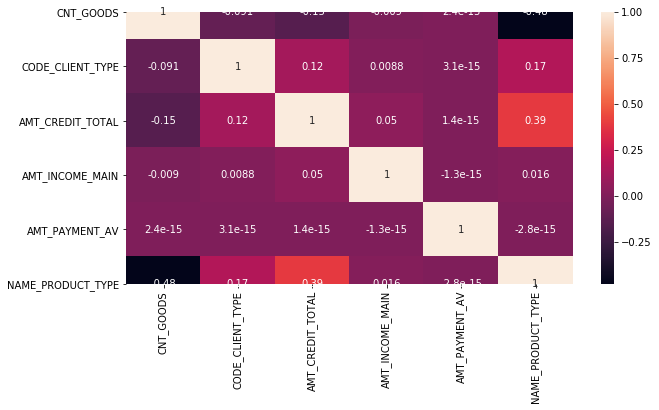

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(X1.corr(),annot=True)

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

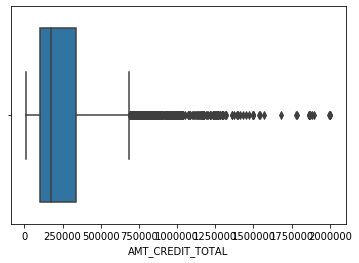

In [121]:
sns.boxplot(X1['AMT_CREDIT_TOTAL']);
plt.show()

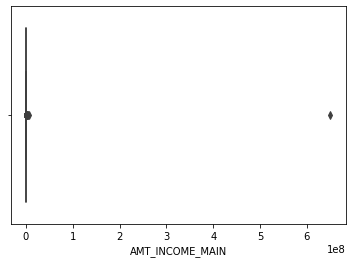

In [122]:
sns.boxplot(X1['AMT_INCOME_MAIN']);
plt.show()